In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Bidirectional, LSTM, Dense

In [61]:
max_features = 10000
maxlen = 500
learning_rate = 0.001
epochs = 5 #10 30
batch_size = 128 #32 300

In [62]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# rnn_model

In [63]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 32))#, input_length = maxlen)
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation = 'sigmoid'))

In [64]:
rnn_model.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

rnn_history = rnn_model.fit(input_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (input_test, y_test), validation_split = 0.2)

Epoch 1/5
196/196 [==============================] - 34s 163ms/step - loss: 0.5983 - accuracy: 0.6776 - val_loss: 0.4702 - val_accuracy: 0.7824
Epoch 2/5
196/196 [==============================] - 33s 167ms/step - loss: 0.3599 - accuracy: 0.8508 - val_loss: 0.3594 - val_accuracy: 0.8488
Epoch 3/5
196/196 [==============================] - 32s 162ms/step - loss: 0.2427 - accuracy: 0.9072 - val_loss: 0.3801 - val_accuracy: 0.8307
Epoch 4/5
196/196 [==============================] - 33s 169ms/step - loss: 0.1570 - accuracy: 0.9456 - val_loss: 0.4048 - val_accuracy: 0.8399
Epoch 5/5
196/196 [==============================] - 37s 187ms/step - loss: 0.1102 - accuracy: 0.9618 - val_loss: 0.4385 - val_accuracy: 0.8501


In [65]:
test_loss, test_accuracy = rnn_model.evaluate(input_test, y_test)

782/782 [==============================] - 18s 23ms/step - loss: 0.4385 - accuracy: 0.8501


In [66]:
predictions = rnn_model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Pred: {binary_predictions[i]}, True: {y_test[i]}\n")

782/782 [==============================] - 18s 23ms/step
Pred: 0, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 1, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 0, True: 0

Pred: 1, True: 0

Pred: 1, True: 1



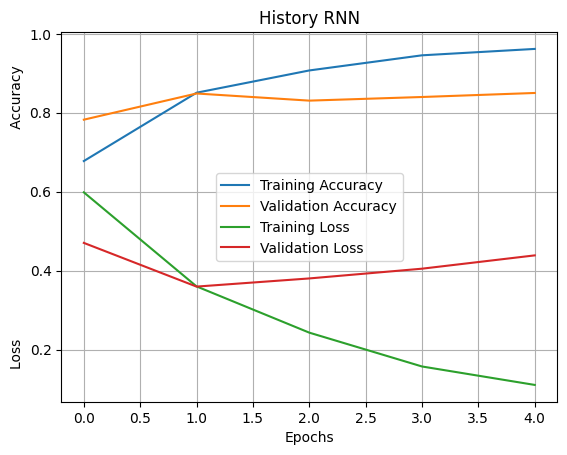

In [67]:
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History RNN")
plt.grid()
plt.legend()
plt.show()

# lstm_model

In [68]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 32))#, input_length = maxlen)
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation = 'sigmoid'))

In [69]:
lstm_model.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

lstm_history = lstm_model.fit(input_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (input_test, y_test), validation_split = 0.2)

Epoch 1/5
196/196 [==============================] - 78s 386ms/step - loss: 0.4939 - accuracy: 0.7458 - val_loss: 0.3294 - val_accuracy: 0.8622
Epoch 2/5
196/196 [==============================] - 76s 388ms/step - loss: 0.2577 - accuracy: 0.9007 - val_loss: 0.3085 - val_accuracy: 0.8750
Epoch 3/5
196/196 [==============================] - 78s 397ms/step - loss: 0.1850 - accuracy: 0.9350 - val_loss: 0.3039 - val_accuracy: 0.8753
Epoch 4/5
196/196 [==============================] - 74s 380ms/step - loss: 0.1462 - accuracy: 0.9486 - val_loss: 0.3677 - val_accuracy: 0.8708
Epoch 5/5
196/196 [==============================] - 79s 402ms/step - loss: 0.1263 - accuracy: 0.9560 - val_loss: 0.3471 - val_accuracy: 0.8661


In [70]:
test_loss, test_accuracy = lstm_model.evaluate(input_test, y_test)

782/782 [==============================] - 33s 42ms/step - loss: 0.3471 - accuracy: 0.8661


In [71]:
predictions = lstm_model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Pred: {binary_predictions[i]}, True: {y_test[i]}\n")

782/782 [==============================] - 32s 41ms/step
Pred: 0, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 1, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 0, True: 0

Pred: 1, True: 0

Pred: 1, True: 1



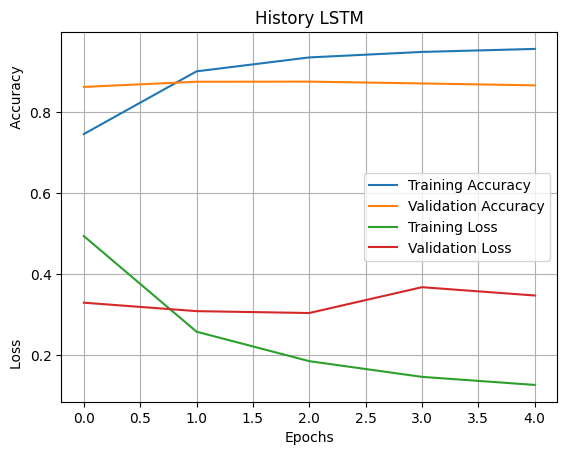

In [72]:
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History LSTM")
plt.grid()
plt.legend()
plt.show()

# brnn_model

In [73]:
brnn_model = Sequential()
brnn_model.add(Embedding(max_features, 32))#, input_length = maxlen)
brnn_model.add(Bidirectional(LSTM(32)))
brnn_model.add(Dense(1, activation = 'sigmoid'))

In [74]:
brnn_model.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

brnn_history = brnn_model.fit(input_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (input_test, y_test), validation_split = 0.2)

Epoch 1/5
196/196 [==============================] - 146s 726ms/step - loss: 0.4684 - accuracy: 0.7723 - val_loss: 0.3201 - val_accuracy: 0.8711
Epoch 2/5
196/196 [==============================] - 141s 722ms/step - loss: 0.2437 - accuracy: 0.9078 - val_loss: 0.2905 - val_accuracy: 0.8819
Epoch 3/5
196/196 [==============================] - 142s 726ms/step - loss: 0.1967 - accuracy: 0.9297 - val_loss: 0.4156 - val_accuracy: 0.8502
Epoch 4/5
196/196 [==============================] - 144s 736ms/step - loss: 0.1827 - accuracy: 0.9342 - val_loss: 0.3225 - val_accuracy: 0.8700
Epoch 5/5
196/196 [==============================] - 130s 667ms/step - loss: 0.1414 - accuracy: 0.9512 - val_loss: 0.3868 - val_accuracy: 0.8588


In [75]:
test_loss, test_accuracy = brnn_model.evaluate(input_test, y_test)

782/782 [==============================] - 52s 67ms/step - loss: 0.3868 - accuracy: 0.8588


In [76]:
predictions = brnn_model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Pred: {binary_predictions[i]}, True: {y_test[i]}\n")

782/782 [==============================] - 55s 68ms/step
Pred: 0, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 0, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 0, True: 0

Pred: 1, True: 0

Pred: 1, True: 1



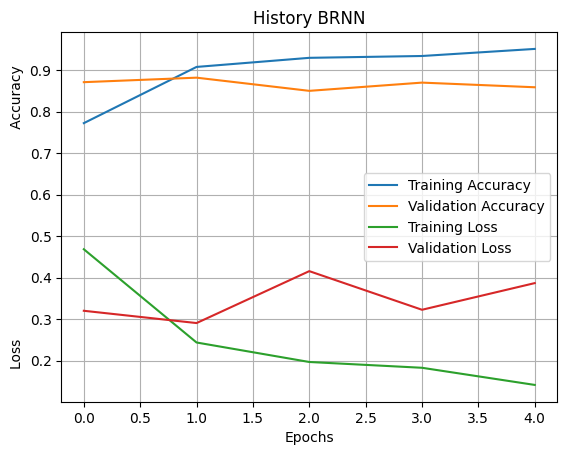

In [77]:
plt.plot(brnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(brnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(brnn_history.history['loss'], label='Training Loss')
plt.plot(brnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History BRNN")
plt.grid()
plt.legend()
plt.show()

# drnn_model

In [78]:
drnn_model = Sequential()
drnn_model.add(Embedding(max_features, 32))#, input_length = maxlen)
drnn_model.add(Bidirectional(LSTM(32, return_sequences=True)))
drnn_model.add(Bidirectional(LSTM(32)))
drnn_model.add(Dense(1, activation = 'sigmoid'))

In [79]:
drnn_model.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

drnn_history = drnn_model.fit(input_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (input_test, y_test), validation_split = 0.2)

Epoch 1/5
196/196 [==============================] - 320s 2s/step - loss: 0.4759 - accuracy: 0.7588 - val_loss: 0.3368 - val_accuracy: 0.8606
Epoch 2/5
196/196 [==============================] - 331s 2s/step - loss: 0.2527 - accuracy: 0.9008 - val_loss: 0.3047 - val_accuracy: 0.8724
Epoch 3/5
196/196 [==============================] - 304s 2s/step - loss: 0.1858 - accuracy: 0.9312 - val_loss: 0.3206 - val_accuracy: 0.8756
Epoch 4/5
196/196 [==============================] - 323s 2s/step - loss: 0.1328 - accuracy: 0.9535 - val_loss: 0.3811 - val_accuracy: 0.8692
Epoch 5/5
196/196 [==============================] - 320s 2s/step - loss: 0.1022 - accuracy: 0.9670 - val_loss: 0.4343 - val_accuracy: 0.8694


In [80]:
test_loss, test_accuracy = drnn_model.evaluate(input_test, y_test)

782/782 [==============================] - 111s 143ms/step - loss: 0.4343 - accuracy: 0.8694


In [81]:
predictions = drnn_model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Pred: {binary_predictions[i]}, True: {y_test[i]}\n")

782/782 [==============================] - 110s 139ms/step
Pred: 0, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 0, True: 0

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 1, True: 1

Pred: 0, True: 0

Pred: 1, True: 0

Pred: 1, True: 1



In [ ]:
plt.plot(drnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(drnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(drnn_history.history['loss'], label='Training Loss')
plt.plot(drnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History DRNN")
plt.grid()
plt.legend()
plt.show()

rnn_model loss: 0.1102 - accuracy: 0.9618 - val_loss: 0.4385 - val_accuracy: 0.8501
lstm_model loss: 0.1263 - accuracy: 0.9560 - val_loss: 0.3471 - val_accuracy: 0.8661
brnn_model loss: 0.1414 - accuracy: 0.9512 - val_loss: 0.3868 - val_accuracy: 0.8588
drnn_model loss: 0.1022 - accuracy: 0.9670 - val_loss: 0.4343 - val_accuracy: 0.8694
Всі чотири моделі показали, можна сказати, майже однаковий результат з val_accuracy, але суттєво найнижчі val_loss мають lstm 0.3471 та brnn 0.3868. На практиці rnn_model та lstm_model на десяти прогнозах мали по дві помилки, а brnn_model та drnn_model по одній.